In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from proj2_helpers import *

In [2]:
data = np.loadtxt('data/data.txt', dtype=int)
movies = pd.read_csv('data/movies.csv', sep=',', encoding='latin1')

In [3]:
get_avg_rating(movies, data)
get_num_rating(movies, data)

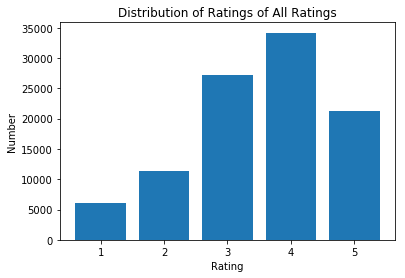

In [4]:
# Plot the distribution of all ratings
_ = hist_from_data(movies, data, title='All Ratings')

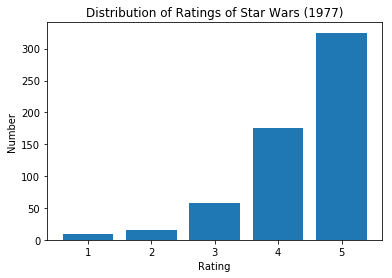

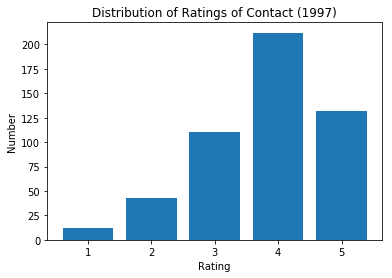

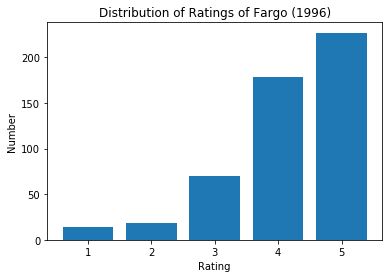

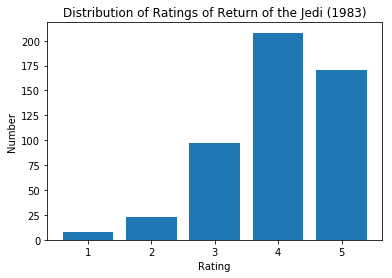

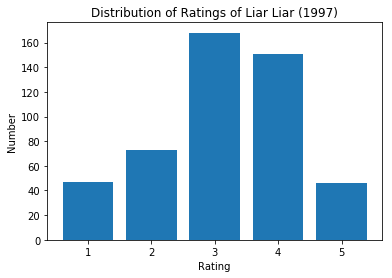

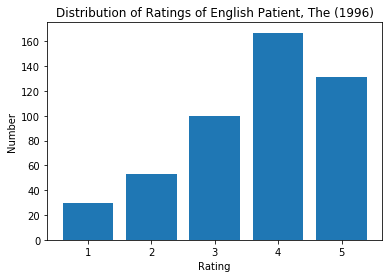

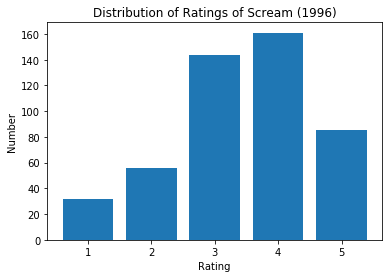

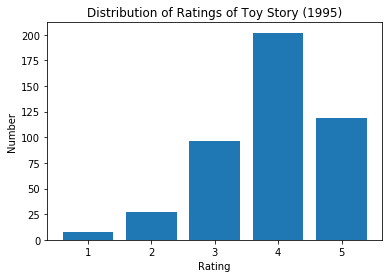

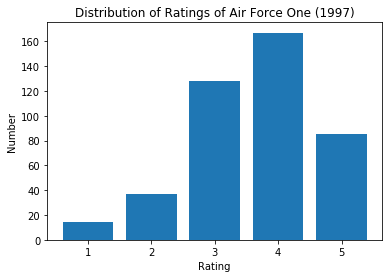

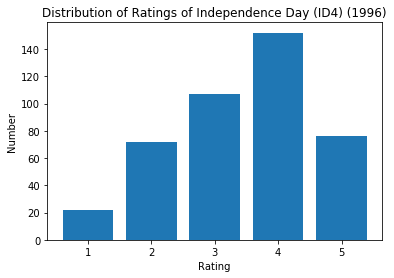

In [5]:
top_10_ratings = (movies.sort_values('Num', ascending=False)[:10]['Movie Id'])


for movie_id in top_10_ratings:
    movie_data = data_from_ids(movies, movie_id, data)
    movie_title = get_title_from_id(movies, movie_id)
    hist_from_data(movies, movie_data, title=movie_title)

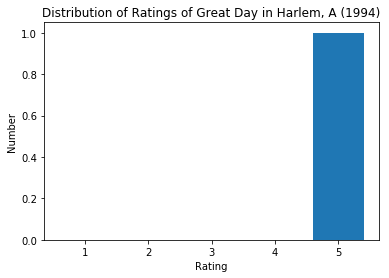

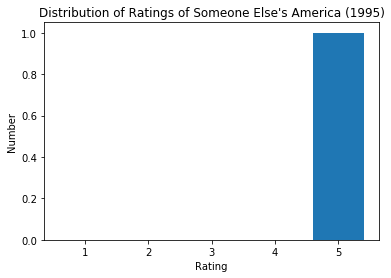

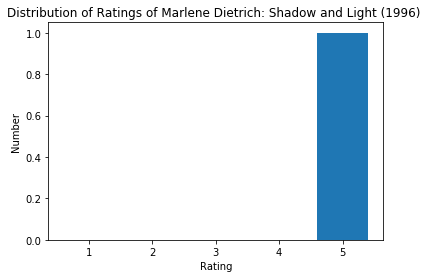

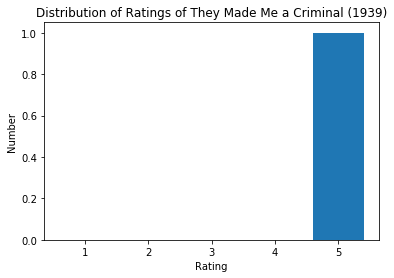

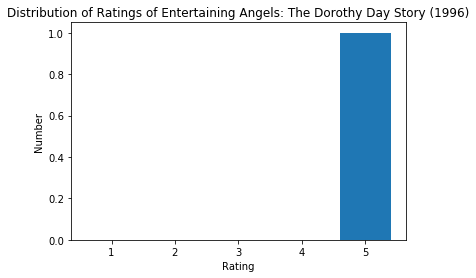

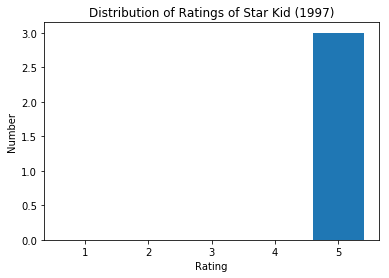

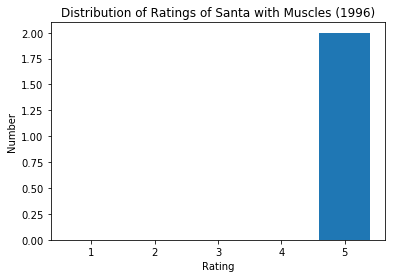

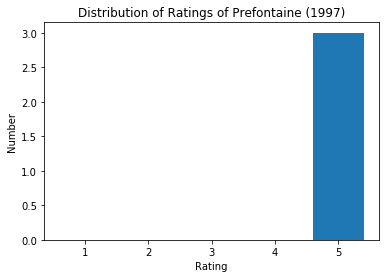

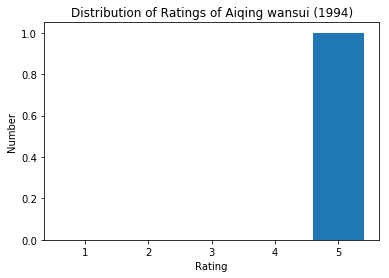

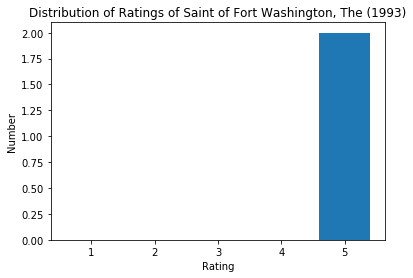

In [6]:
top_10_ratings = (movies.sort_values('Avg', ascending=False)[:10]['Movie Id'])

for movie_id in top_10_ratings:
    movie_data = data_from_ids(movies, movie_id, data)
    movie_title = get_title_from_id(movies, movie_id)
    hist_from_data(movies, movie_data, title=movie_title)

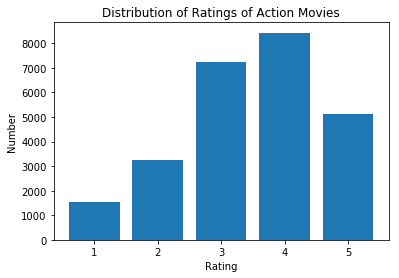

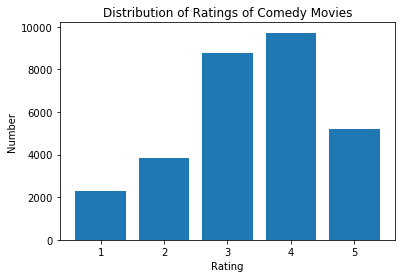

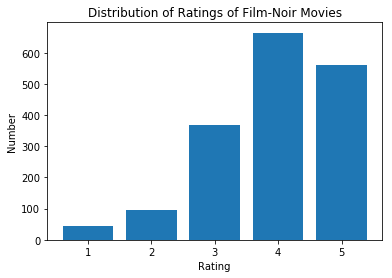

In [7]:
genres = ['Action', 'Comedy', 'Film-Noir']

for genre in genres:
    ids = movies[movies[genre]==1]['Movie Id']
    movie_data = data_from_ids(movies, ids, data)
    movie_title = genre+' Movies'
    hist_from_data(movies, movie_data, title=movie_title)

In [ ]:
'''

def get_avg_rating(movies_df, data_arr):
    avg = np.zeros(len(movies_df))
    for movie_id in movies_df['Movie Id']:
        inds = (data_arr[:,1] == movie_id)
        avg[movie_id-1] = (np.mean(data_arr[:,2][inds]))
    movies_df['Avg'] = avg

def get_title_from_id(movies, movie_id):
    '''Returns the movie title corresponding to the movie id'''
    return movies.iloc[movie_id-1]['Movie Title']

def data_from_ids(movies_df, movie_ids, data_arr):
    '''
    Returns the subset of data_arr corresponding to the movie ids
    
    Inputs:
        movies_df: pandas dataframe of movies. Each row represents one movie, 
        and contains information on the genre, movie id, and movie title,
        and average rating
        
        movie_ids: an int or an iterable of ints with the movie ids to include
        
        data_arr: numpy array of all rating data, each row contains
        the user id, movie id, and a rating from 1 to 5
        
    Returns:
        An numpy array of the ratings for the data matching the inputted ids
        
    '''
    inds = np.zeros(len(data_arr), dtype=bool)
    if type(movie_ids) == int or type(movie_ids) == np.int64:    
        inds = (data_arr[:,1] == movie_ids)
    else:
        for movie_id in movie_ids:
            inds += (data_arr[:,1] == movie_id)
    return data_arr[inds]

def hist_from_data(movies_df, data_arr, plot_fig=True, save_fig=False, title=''):
    '''
    Plots the histogram of movie distributions for a single movie.
    
    Inputs:
        movies_df: pandas dataframe of movies. Each row represents one movie, 
        and contains information on the genre, movie id, and movie title,
        and average rating
        
        data_arr: a numpy array of the rating data, containing in each row a
        user id, a movie id, and a rating from 1 to 5.
        
        plot_fig: boolean variable for whether of plot the histogram (default == True)
    
        save_plot: boolean variable for whether to save the histogram. (default == False)
    
    Returns:
        The numpy arrays of labels and frequencies used to plot the histogram
    
    Also prints the histogram to output
    '''                            
    freq, labels = np.histogram(data_arr[:,2], bins = np.arange(6)+.5)
    labels = (labels[1:] + labels[:-1])/2
    plt.figure()
    plt.title('Distribution of Ratings of {}'.format(title))
    plt.bar(labels, freq)
    plt.xlabel('Rating')
    plt.ylabel('Number')
    if plot_fig == True:
        plt.show()
    if save_fig == True:
        plt.savefig(title)
    return labels, freq

# Plot the distribution of all ratings
freq, labels = np.histogram(data[:,2], bins = 5)

plt.figure()
plt.title('Distribution of Ratings')
plt.bar(np.arange(1, 6), freq)
plt.xlabel('Rating')
plt.ylabel('Number')
plt.show()

movie_id_sorted = np.bincount(data[:,0])[::-1]
top_10_ratings = movie_id_sorted[:10]

for movie_id in top_10_ratings:
    inds = (data[:,1] == movie_id)                              
    freq, labels = np.histogram(data[:,2][inds], bins = 5)
    plt.figure()
    plt.title('Distribution of Ratings of {}'.format(get_title_from_id(movies, movie_id)))
    plt.bar(np.arange(1, 6), freq)
    plt.xlabel('Rating')
    plt.ylabel('Number')
    plt.show()
    
for movie_id in (movies.sort_values('Avg', ascending=False)[:10]['Movie Id']):
    inds = (data[:,1] == movie_id)                              
    freq, labels = np.histogram(data[:,2][inds], bins = 5)
    plt.figure()
    plt.title('Distribution of Ratings of {}'.format(get_title_from_id(movies, movie_id)))
    plt.hist(data[:,2][inds], bins=np.arange(1,6)+.5)
    plt.xlabel('Rating')
    plt.ylabel('Number')
    plt.show()

genres = ['Action', 'Comedy', 'Film-Noir']

for genre in genres:
    ids = movies[movies[genre]==1]['Movie Id']
    freqs = np.zeros(5)
    for movie_id in ids:
        inds = (data[:,1] == movie_id)                              
        freq, labels = np.histogram(data[:,2][inds], bins = np.arange(6)+.5)
        freqs += freq
    plt.figure()
    plt.title('Distribution of {} Movies'.format(genre))
    plt.xlabel('Rating')
    plt.ylabel('Number')
    plt.bar(np.arange(1,6), freqs)
    plt.show()
'''